# 随机森林

In [2]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', 500)

### 导入数据

In [6]:
train_df = pd.read_pickle('../data/data_train.pkl')
test_df = pd.read_pickle('../data/data_test.pkl')

### *可参考的一些处理错误数据的方法

In [ ]:
# 可以对一些明显错误的数据进行修改，数据量很小，后来选择直接改成 NaN
# train_df[train_df['100006'].str.contains(r'[0-9]')==False]['100006']
# train_df[train_df['269004'].str.contains(r'[0-9]')==False]['269004']
# train_df[train_df['269005'].str.contains(r'[0-9]')==False]['269005']

In [ ]:
# **把所有为`---`的值改为NaN**

# train_df.replace(to_replace=r'\-+', value=np.nan, inplace=True, regex=True)

# for col in test_df.describe().columns.values:
#     if col not in train_df.describe().columns.values:
#         train_df[col] = pd.to_numeric(train_df[col], downcast='float', errors='ignore')

In [ ]:
# 只是多了两列特征，因为不只是---的问题

# train_df[train_df['269004'].str.match(r'^(-?\d+\.\d+)?;(-?\d+\.\d+)?')==True]['269004']

In [ ]:
# **有很多特征值有重复，变成了数值；数值的格式**

# train_df.replace(to_replace=r'^(-?\d+\.\d+)?;(-?\d+\.\d+)?', value=r'\1', inplace=True, regex=True)

# train_df.loc[23268]['269004']

# for col in test_df.describe().columns.values:
#     if col not in train_df.describe().columns.values:
#         train_df[col] = pd.to_numeric(train_df[col], downcast='float', errors='ignore')

In [ ]:
# 还有几列有问题，print出来看看。

# for col in test_df.describe().columns.values:
#     if col not in train_df.describe().columns.values:
#         print(col)

# print(train_df['269012'].count(),
# train_df['313'].count(),
# train_df['32'].count(),
# train_df['38'].count())

In [ ]:
# train_df[train_df['269012'].str.match(r'^(-?\d+)(\.\d+)?')==False]['269012']

# pd.to_numeric(train_df['269012'], downcast='float')

In [ ]:
# 可以看到还有末尾多一个小数点的数据，把小数点去掉

# train_df.replace(to_replace=r'^(-?\d+\.\d+)?(-?\d+)?.$', value=r'\1', regex=True, inplace=True)

In [ ]:
# 处理特例

# train_df.loc[26333]['313'] 

# train_df.loc[26333,['313']] = 189

In [ ]:
# for col in test_df.describe().columns.values:
#     if col not in train_df.describe().columns.values:
#         train_df[col] = pd.to_numeric(train_df[col], downcast='float', errors='ignore') #用apply更好

## 用这些特征试试看看简单的算法

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit

In [8]:
feature = train_df.describe().columns.values.tolist()[5:]

In [9]:
label = train_df.describe().columns.values.tolist()[0:5]

In [10]:
# X_train = train_df.loc[:,feature].fillna(0)
# Y_train = train_df.loc[:,label].fillna(0)
# X_test = test_df.loc[:,feature].fillna(0)
to_fill = train_df.median()
X_train = train_df.loc[:,feature].fillna(to_fill)
Y_train = train_df.loc[:,label].fillna(to_fill)
X_test = test_df.loc[:,feature].fillna(to_fill)

In [11]:
X_train.shape, Y_train.shape, X_test.shape

((38199, 102), (38199, 5), (9538, 102))

In [12]:
cv = ShuffleSplit(n_splits=2, test_size=0.3, random_state=0)

## 随机森林

In [13]:
random_forest = RandomForestRegressor(n_estimators=50)
random_forest.fit(X_train, Y_train)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

88.25

In [14]:
random_forest.feature_importances_

array([0.02003366, 0.00698347, 0.00769924, 0.00698916, 0.00285351,
       0.01242142, 0.00985131, 0.03987048, 0.00451939, 0.00462626,
       0.02399757, 0.0219004 , 0.0052409 , 0.00790981, 0.00760382,
       0.01034405, 0.00288485, 0.00651577, 0.00255395, 0.00561864,
       0.0228384 , 0.03138345, 0.01226266, 0.00872179, 0.00886891,
       0.07189295, 0.02631442, 0.02707126, 0.01858227, 0.01511906,
       0.01255644, 0.01640447, 0.01513796, 0.03170879, 0.02078585,
       0.13197086, 0.00809862, 0.0100038 , 0.00403926, 0.00398978,
       0.00321878, 0.00431074, 0.00420041, 0.00396355, 0.00453524,
       0.0049104 , 0.0042572 , 0.00375486, 0.00378437, 0.00375701,
       0.00356634, 0.00399506, 0.00346686, 0.00451939, 0.00342612,
       0.00370914, 0.00343527, 0.00233851, 0.00306261, 0.00422151,
       0.00556237, 0.00514302, 0.00916059, 0.00703782, 0.00908664,
       0.01235864, 0.00869908, 0.00876101, 0.00832057, 0.00913274,
       0.00909378, 0.00741521, 0.00760713, 0.00726527, 0.00364

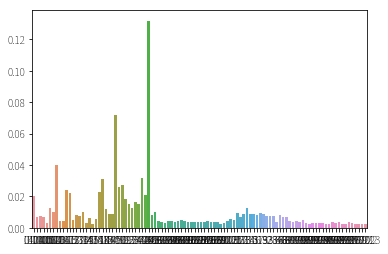

In [15]:
sns.barplot(feature,random_forest.feature_importances_)
plt.rcParams['figure.figsize'] = [50, 5]

In [18]:
feature_importances = pd.DataFrame({'feature': feature, 'importance': random_forest.feature_importances_ })
sorted_imp = feature_importances.sort_values(by='importance')
sorted_imp[sorted_imp['importance']>0.01].loc[:,'feature'].astype('str').values

array(['2420', '1345', '183', '314', '10002', '2174', '193', '2372',
       '2333', '192', '0424', '2404', '1117', '1814', '1115', '190',
       '191', '1815', '2403', '10004', '1850', '2405'], dtype=object)

In [17]:
sorted_imp.tail(20)

,feature,importance
22,183,0.012263
65,314,0.012359
5,10002,0.012421
30,2174,0.012556
29,193,0.015119
32,2372,0.015138
31,2333,0.016404
28,192,0.018582
0,0424,0.020034
34,2404,0.020786


In [24]:
# from sklearn.feature_selection import SelectFromModel
# model = SelectFromModel(random_forest, prefit=True)
# X_train_new = model.transform(X_train)
# X_train_new.shape

In [ ]:
cross_val_score(random_forest, X_train, Y_train, cv=cv, scoring='neg_mean_squared_log_error')

In [ ]:
Y_pred_rf = random_forest.predict(X_test)
print((Y_pred_rf<0).sum())
Y_pred_rf_df = pd.DataFrame(Y_pred_rf, columns=label)
Y_pred_rf_df.head()

In [ ]:
Y_pred_rf_df['vid']=test_df['vid']
Y_pred_rf_df = Y_pred_rf_df.loc[:, ['vid']+label]

In [ ]:
Y_pred_rf_df.to_csv('rf_output.csv',index=False, header=False)